<a href="https://colab.research.google.com/github/arpitaggarwal0511/Clustering-Assignment-102203872/blob/main/Assignment_04_102203872_Arpit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

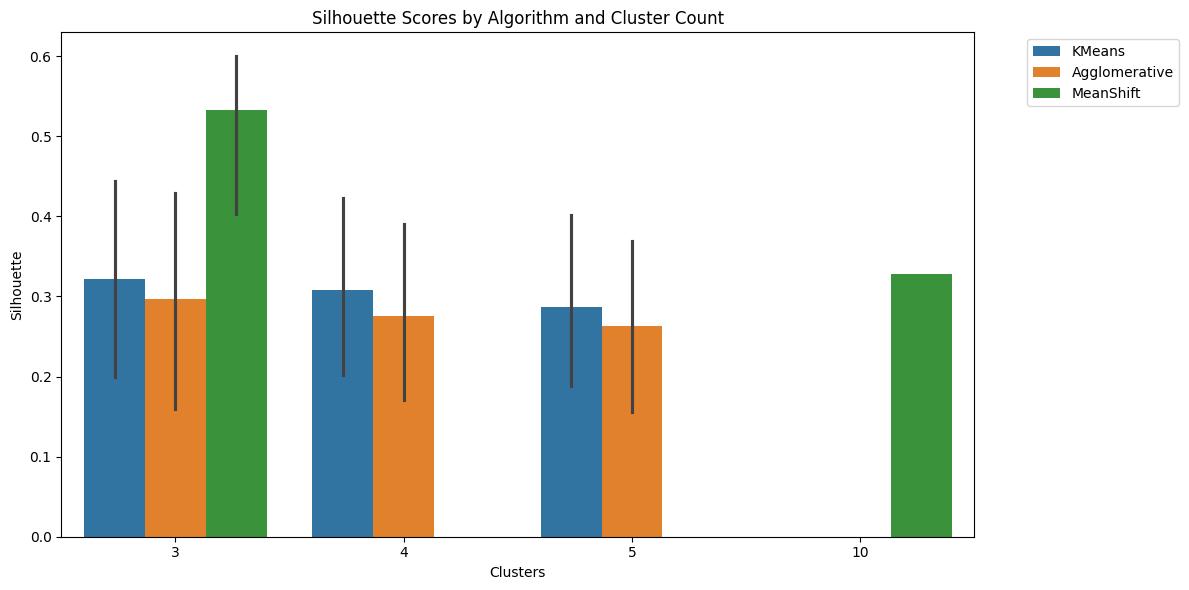


Top 10 Results by Silhouette Score:
        Algorithm  Preprocessing  Clusters  Silhouette  Calinski-Harabasz  \
38      MeanShift            PCA         3    0.599710         737.633148   
36      MeanShift  No Processing         3    0.596312         719.910592   
19  Agglomerative            PCA         3    0.564344        2388.041810   
18         KMeans            PCA         3    0.533152        3141.738723   
0          KMeans  No Processing         3    0.522010        3065.263465   
20         KMeans            PCA         4    0.495615        3160.482689   
2          KMeans  No Processing         4    0.485460        3062.238356   
1   Agglomerative  No Processing         3    0.473985        2675.086249   
21  Agglomerative            PCA         4    0.467624        2816.592014   
23  Agglomerative            PCA         5    0.464938        2929.241417   

    Davies-Bouldin  
38        0.367840  
36        0.370923  
19        0.609146  
18        0.656697  
0         

In [5]:
# Wine Quality Clustering Analysis (Red Wine)

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Red Wine dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
X = df.drop('quality', axis=1)

# Preprocessing functions
def normalize(X):
    return StandardScaler().fit_transform(X)

def transform(X):
    return PowerTransformer().fit_transform(X)

def apply_pca(X):
    return PCA(n_components=2).fit_transform(X)

# Clustering algorithms
def get_models(n_clusters):
    return {
        'KMeans': KMeans(n_clusters=n_clusters, random_state=42),
        'Agglomerative': AgglomerativeClustering(n_clusters=n_clusters)
    }

# MeanShift doesn’t need a predefined cluster count
def mean_shift_model(X):
    return MeanShift().fit(X)

# Evaluation function
def evaluate_model(X, labels):
    return {
        'Silhouette': silhouette_score(X, labels),
        'Calinski-Harabasz': calinski_harabasz_score(X, labels),
        'Davies-Bouldin': davies_bouldin_score(X, labels)
    }

# Store all results
results = []

# Define preprocessing combinations
preprocess_options = {
    'No Processing': lambda X: X,
    'Normalization': normalize,
    'Transform': transform,
    'PCA': lambda X: apply_pca(X),
    'T+N': lambda X: transform(normalize(X)),
    'T+N+PCA': lambda X: apply_pca(transform(normalize(X)))
}

# For KMeans and Agglomerative Clustering
for method, func in preprocess_options.items():
    X_prep = func(X)
    for n_clusters in [3, 4, 5]:
        models = get_models(n_clusters)
        for name, model in models.items():
            labels = model.fit_predict(X_prep)
            scores = evaluate_model(X_prep, labels)
            results.append([name, method, n_clusters, scores['Silhouette'], scores['Calinski-Harabasz'], scores['Davies-Bouldin']])

# For MeanShift
for method, func in preprocess_options.items():
    if method == 'Transform':
        continue  # MeanShift doesn’t work well with non-normalized data
    X_prep = func(X)
    model = mean_shift_model(X_prep)
    labels = model.labels_
    n_clusters = len(np.unique(labels))
    if n_clusters <= 1:
        continue  # Skip invalid results
    scores = evaluate_model(X_prep, labels)
    results.append(['MeanShift', method, n_clusters, scores['Silhouette'], scores['Calinski-Harabasz'], scores['Davies-Bouldin']])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Algorithm', 'Preprocessing', 'Clusters', 'Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin'])

# Save to CSV
results_df.to_csv("clustering_results.csv", index=False)

# Visualize results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x='Clusters', y='Silhouette', hue='Algorithm')
plt.title('Silhouette Scores by Algorithm and Cluster Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Display table
print("\nTop 10 Results by Silhouette Score:")
print(results_df.sort_values(by='Silhouette', ascending=False).head(10))